In [1]:
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3,VGG16,ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

4423680/4422102 [==============================] - 0s 0us/step


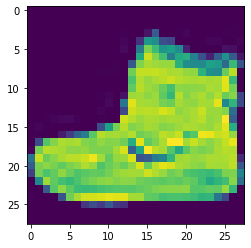

In [3]:
plt.imshow(x_train[0])

In [0]:
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

In [0]:
rgb_list = []
dim = (139, 139)
for i in range(len(x_train)):
    rgb = to_rgb(x_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape) 
rgb_arr = np.stack([rgb_list],axis=4)
X_train = np.squeeze(rgb_arr, axis=4)

In [0]:
rgb_list = []
for i in range(len(x_test)):
    rgb = to_rgb(x_test[i])
    rgb_list.append(rgb)
    #print(rgb.shape) 
rgb_arr = np.stack([rgb_list],axis=4)
X_test = np.squeeze(rgb_arr, axis=4)

In [0]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


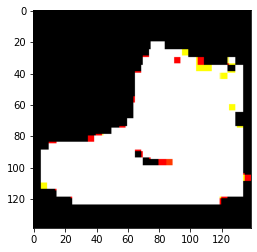

In [9]:
plt.imshow(X_train[0])

In [10]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 139, 139, 3) (10000, 139, 139, 3) (60000, 10) (10000, 10)


In [11]:
base = ResNet50(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step


In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              8392704   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 32,021,386
Trainable params: 8,433,674
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
model.fit(X_train,y_train,epochs=10,batch_size=500,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 294s 5ms/step - loss: 1.0909 - accuracy: 0.7396 - val_loss: 1.4515 - val_accuracy: 0.5558
Epoch 2/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.4670 - accuracy: 0.8331 - val_loss: 1.4010 - val_accuracy: 0.6004
Epoch 3/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.3846 - accuracy: 0.8614 - val_loss: 1.9642 - val_accuracy: 0.4959
Epoch 4/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.3393 - accuracy: 0.8778 - val_loss: 1.8971 - val_accuracy: 0.5004
Epoch 5/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.3084 - accuracy: 0.8887 - val_loss: 1.7545 - val_accuracy: 0.5540
Epoch 6/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.2762 - accuracy: 0.9004 - val_loss: 1.9548 - val_accuracy: 0.5347
Epoch 7/10
60000/60000 [==============================] - 282s

In [0]:
from sklearn.metrics import precision_score,recall_score,log_loss

In [17]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.4381443298969072
Precision for class 1 = 0.9388560157790927
Precision for class 2 = 0.8898305084745762
Precision for class 3 = 0.48845108695652173
Precision for class 4 = 0.32268970698722765
Precision for class 5 = 0.9289340101522843
Precision for class 6 = 0.30097087378640774
Precision for class 7 = 1.0
Precision for class 8 = 0.8238255033557047
Precision for class 9 = 0.8848920863309353
Mean Precision =  0.7016594121719658


In [19]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.765
Recall for class 1 = 0.952
Recall for class 2 = 0.315
Recall for class 3 = 0.719
Recall for class 4 = 0.859
Recall for class 5 = 0.183
Recall for class 6 = 0.155
Recall for class 7 = 0.001
Recall for class 8 = 0.491
Recall for class 9 = 0.492
Mean Recall =  0.4932


In [20]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  14.644901708460733
